In [5]:
from datasets import load_metric
from librosa import get_duration

wer = load_metric("wer")
cer = load_metric("cer")

print('L2 Swedish')
df_sv=pd.read_csv('/scratch/work/getmany1/wav2vec/slt_2022/sv/swedish_df_with_asr_transcripts.csv',encoding='utf-8')
dur_list_sv=[]
for idx,row in df_sv.iterrows():
    dur_list_sv+=[get_duration(filename=row.recording_path)]
print(f"{len(df_sv)} recordings with the total duration of {sum(dur_list_sv)/3600:.2f} hours.")
df_sv['cefr_mean'] = df_sv['cefr_mean'].map(np.vectorize(true_round))
print(f"Overall WER: {100*wer.compute(predictions=df_sv.ASR_transcript,references=df_sv.transcript_normalized):.2f}%")
print(f"Overall CER: {100*cer.compute(predictions=df_sv.ASR_transcript,references=df_sv.transcript_normalized):.2f}%")
print('Statistics per CEFR class:')
for i,item in enumerate(df_sv['cefr_mean'].value_counts().sort_index().to_list()):
    print(f"CEFR {i+1}. Number of samples: {item}. \
    WER: {100*wer.compute(predictions=df_sv[df_sv.cefr_mean==i+1].ASR_transcript,references=df_sv[df_sv.cefr_mean==i+1].transcript_normalized):.2f}%. \
    CER: {100*cer.compute(predictions=df_sv[df_sv.cefr_mean==i+1].ASR_transcript,references=df_sv[df_sv.cefr_mean==i+1].transcript_normalized):.2f}%.")

print('=============================================================================')

print('L2 Finnish')
df_fi=pd.read_csv('/scratch/work/getmany1/wav2vec/slt_2022/fi/finnish_df_with_asr_transcripts.csv',encoding='utf-8')
dur_list_fi=[]
for idx,row in df_fi.iterrows():
    dur_list_fi+=[get_duration(filename=row.recording_path)]
print(f"{len(df_fi)} recordings with the total duration of {sum(dur_list_fi)/3600:.2f} hours.")
df_fi['cefr_mean'] = df_fi['cefr_mean'].map(np.vectorize(true_round))
print(f"Overall WER: {100*wer.compute(predictions=df_fi.ASR_transcript,references=df_fi.transcript_normalized):.2f}%")
print(f"Overall CER: {100*cer.compute(predictions=df_fi.ASR_transcript,references=df_fi.transcript_normalized):.2f}%")
print('Statistics per CEFR class:')
for i,item in enumerate(df_fi['cefr_mean'].value_counts().sort_index().to_list()):
    print(f"CEFR {i+1}. Number of samples: {item}. \
    WER: {100*wer.compute(predictions=df_fi[df_fi.cefr_mean==i+1].ASR_transcript,references=df_fi[df_fi.cefr_mean==i+1].transcript_normalized):.2f}%. \
    CER: {100*cer.compute(predictions=df_fi[df_fi.cefr_mean==i+1].ASR_transcript,references=df_fi[df_fi.cefr_mean==i+1].transcript_normalized):.2f}%.")

L2 Swedish
1542 recordings with the total duration of 5.57 hours.
Overall WER: 17.71%
Overall CER: 9.08%
Statistics per CEFR class:
CEFR 1. Number of samples: 15.     WER: 27.63%.     CER: 14.47%.
CEFR 2. Number of samples: 253.     WER: 23.81%.     CER: 13.13%.
CEFR 3. Number of samples: 678.     WER: 19.58%.     CER: 10.24%.
CEFR 4. Number of samples: 456.     WER: 14.54%.     CER: 7.16%.
CEFR 5. Number of samples: 119.     WER: 12.21%.     CER: 5.72%.
CEFR 6. Number of samples: 21.     WER: 5.06%.     CER: 2.27%.
L2 Finnish
2112 recordings with the total duration of 14.08 hours.
Overall WER: 21.89%
Overall CER: 7.06%
Statistics per CEFR class:
CEFR 1. Number of samples: 2.     WER: 28.57%.     CER: 11.76%.
CEFR 2. Number of samples: 262.     WER: 30.37%.     CER: 8.52%.
CEFR 3. Number of samples: 546.     WER: 28.88%.     CER: 8.07%.
CEFR 4. Number of samples: 420.     WER: 24.25%.     CER: 7.59%.
CEFR 5. Number of samples: 420.     WER: 19.63%.     CER: 6.39%.
CEFR 6. Number of sam

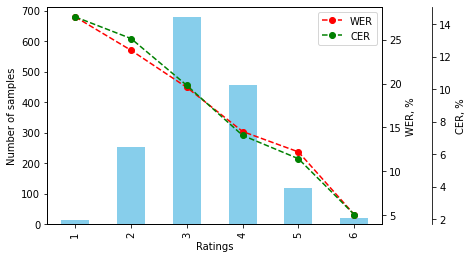

In [5]:
import matplotlib.pyplot as plt

rating_to_wer_dict_sv={}
rating_to_cer_dict_sv={}

for i,item in enumerate(df_sv['cefr_mean'].value_counts().sort_index().to_list()):
    rating_to_wer_dict_sv[i]=100*wer.compute(predictions=df_sv[df_sv.cefr_mean==i+1].ASR_transcript,references=df_sv[df_sv.cefr_mean==i+1].transcript_normalized)
    rating_to_cer_dict_sv[i]=100*cer.compute(predictions=df_sv[df_sv.cefr_mean==i+1].ASR_transcript,references=df_sv[df_sv.cefr_mean==i+1].transcript_normalized)

fig, ax = plt.subplots()

ax=df_sv.cefr_mean.value_counts().sort_index().plot(kind='bar',ax=ax, color = "skyblue")
ax.set(xlabel="Ratings", ylabel="Number of samples")

ax2 = ax.twinx()
lists = sorted(rating_to_wer_dict_sv.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
p2, = ax2.plot(x, y, "red", label="WER", marker="o", linestyle = 'dashed')
ax2.set_ylabel("WER, %")

ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.15))
lists = sorted(rating_to_cer_dict_sv.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
p3, = ax3.plot(x, y, "green", label="CER", marker="o", linestyle = 'dashed')
ax3.set_ylabel("CER, %")

ax2.legend(handles=[p2,p3])

fig.savefig('/scratch/work/getmany1/wav2vec/slt_2022/sv/swedish_ratings.png', format='png', bbox_inches="tight")

fig.show()

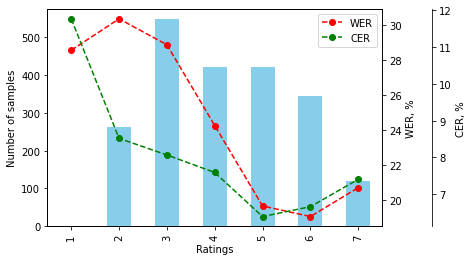

In [15]:
import matplotlib.pyplot as plt

rating_to_wer_dict_fi={}
rating_to_cer_dict_fi={}

for i,item in enumerate(df_fi['cefr_mean'].value_counts().sort_index().to_list()):
    rating_to_wer_dict_fi[i]=100*wer.compute(predictions=df_fi[df_fi.cefr_mean==i+1].ASR_transcript,references=df_fi[df_fi.cefr_mean==i+1].transcript_normalized)
    rating_to_cer_dict_fi[i]=100*cer.compute(predictions=df_fi[df_fi.cefr_mean==i+1].ASR_transcript,references=df_fi[df_fi.cefr_mean==i+1].transcript_normalized)

fig, ax = plt.subplots()

ax=df_fi.cefr_mean.value_counts().sort_index().plot(kind='bar', ax=ax, color = "skyblue")
ax.set(xlabel="Ratings", ylabel="Number of samples")

ax2 = ax.twinx()
lists = sorted(rating_to_wer_dict_fi.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
p2, = ax2.plot(x, y, "red", label="WER", marker="o", linestyle = 'dashed')
ax2.set_ylabel("WER, %")

ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.15))
lists = sorted(rating_to_cer_dict_fi.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
p3, = ax3.plot(x, y, "green", label="CER", marker="o", linestyle = 'dashed')
ax3.set_ylabel("CER, %")

ax2.legend(handles=[p2,p3])

fig.savefig('/scratch/work/getmany1/wav2vec/slt_2022/fi/finnish_ratings.png', format='png', bbox_inches="tight")

fig.show()

## 06.07.2022. SLT. PFL & W2V2 & W2V2 + PFL ("NATIVE" and "NONNATIVE" are mixed up in the reported outputs!)

In [1]:
import pandas as pd
import numpy as np
import pickle

pronun_features = ['acoustic_model_score','cons_dur_kur', 'cons_dur_max', 
        'cons_dur_mean', 'cons_dur_min',
       'cons_dur_skew', 'cons_dur_var', 'cons_prob_kur', 'cons_prob_max',
       'cons_prob_mean', 'cons_prob_min', 'cons_prob_skew', 'cons_prob_var', 'nPVI_cons', 
       'nPVI_vowels', 'rPVI_cons',
       'rPVI_vowels', 'sample', 'vowels_dur_kur',
       'vowels_dur_max', 'vowels_dur_mean', 'vowels_dur_min',
       'vowels_dur_skew', 'vowels_dur_var', 'vowels_prob_kur',
       'vowels_prob_max', 'vowels_prob_mean', 'vowels_prob_min',
       'vowels_prob_skew', 'vowels_prob_var']

fluen_features = ['sample', 'nsyll', 'npause',
       'dur(s)', 'phonationtime(s)', 'speechrate(nsyll / dur)',
       'articulation rate(nsyll / phonationtime)', 'ASD(speakingtime / nsyll)',
       'voiced_fraction', 'min_pitch', 'relative_min_pitch_time', 'max_pitch',
       'relative_max_pitch_time', 'mean_pitch', 'stddev_pitch', 'q1_pitch',
       'median_intensity', 'q3_pitch', 'mean_absolute_pitch_slope',
       'pitch_slope_without_octave_jumps', 'f1_mean', 'f2_mean', 'f3_mean',
       'f4_mean', 'f1_median', 'f2_median', 'f3_median', 'f4_median',
       'formant_dispersion', 'average_formant', 'mff', 'fitch_vtl', 'delta_f',
       'vtl_delta_f', 'dur(s)']

lexical_features = ['sample', 'length_s',
       'length_w', 'types', 'TTR', 'rootTTR', 'correctedTTR', 'logTTR', 'ovix',
       'tfidf', 'mostfrequentwords', 'leastfrequentwords']

gram_features = ['sample', 'n_tokens', 'tokens_per_sent', 'char_per_tok',
                 'lexical_density', 'verbs_mood_dist', 'verbs_tense_dist', 'verbs_gender_dist',
                 'verbs_form_dist', 'verbs_num_pers_dist', 'verbal_head_total', 'verbal_head_per_sent',
                 'verbal_root_total', 'verbal_root_perc', 'avg_token_per_clause', 'avg_links_len',
                 'max_links_len', 'avg_max_links_len', 'avg_max_depth', 'dep_dist_nsubj', 'dep_dist_advmod',
                 'dep_dist_obj', 'dep_dist_root', 'dep_dist_aux', 'dep_dist_ccomp', 'dep_dist_case', 'dep_dist_obl',
                 'dep_dist_cc', 'dep_dist_conj', 'dep_dist_mark', 'dep_dist_acl', 'dep_total_nsubj',
                 'dep_total_advmod', 'dep_total_obj', 'dep_total_root', 'dep_total_aux', 'dep_total_ccomp',
                 'dep_total_case', 'dep_total_obl', 'dep_total_cc', 'dep_total_conj', 'dep_total_mark',
                 'dep_total_acl', 'subj_pre', 'subj_post', 'obj_pre', 'obj_post', 'n_prepositional_chains',
                 'avg_prepositional_chain_len', 'prepositional_chain_total', 'prepositional_chain_distribution',
                 'subordinate_total_1', 'subordinate_dist_1', 'total_subordinate_proposition', 'total_subordinate_chain',
                 'total_subordinate_chain_len', 'avg_subordinate_chain_len', 'principal_proposition_dist',
                 'subordinate_proposition_dist', 'subordinate_pre', 'subordinate_post', 'verb_edges_dist', 'avg_verb_edges'] #v2, 08.04.2022

RANDOM_SEED = 92

def true_round(x):
    import decimal
    return int(decimal.Decimal(str(x)).quantize(decimal.Decimal("1"), rounding=decimal.ROUND_HALF_UP))

fluen_data = pd.read_csv("/scratch/work/algher1/LAQ_Data/swedish_acoustic_features.csv", usecols=fluen_features)

gram_data = pd.read_csv('/scratch/work/algher1/LAQ_Data/swedish_asr_text_features.csv', usecols=gram_features)

lexical_data = pd.read_csv('/scratch/work/algher1/LAQ_Data/swedish_lexical_asr.csv', usecols=lexical_features)

lang="sv"
model_layer=1
pkl_pt=f"/scratch/work/getmany1/wav2vec/slt_2022/sv/pt/w2v2_digitala_feats_dict_sv_pt_layer_{str(model_layer)}.pkl"
pkl_ft=f"/scratch/work/getmany1/wav2vec/slt_2022/sv/ft/w2v2_digitala_feats_dict_sv_ft_layer_{str(model_layer)}.pkl"

with open(pkl_ft, 'rb') as f:
    w2v2_sv_dict_ft = pickle.load(f)
    
with open(pkl_pt, 'rb') as f:
    w2v2_sv_dict_pt = pickle.load(f)

d2_ft = {k: np.mean(v, axis=0) for k, v in w2v2_sv_dict_ft.items()}
w2v2_data_ft = pd.DataFrame.from_dict(d2_ft, orient='index', )
w2v2_data_ft.index.names = ['sample']
w2v2_data_ft.reset_index(inplace=True)

d2_pt = {k: np.mean(v, axis=0) for k, v in w2v2_sv_dict_pt.items()}
w2v2_data_pt = pd.DataFrame.from_dict(d2_pt, orient='index', )
w2v2_data_pt.index.names = ['sample']
w2v2_data_pt.reset_index(inplace=True)

holistic_labels = pd.read_csv("/scratch/work/getmany1/swedish_df.csv", usecols=['sample','cefr_mean','accuracy_mean',
                                                                               'range_mean','fluency_mean','pronunciation_mean',
                                                                               'split'])
holistic_labels.rename(columns={'cefr_mean': 'holistic_FairAvg'}, inplace=True)
holistic_labels.rename(columns={'accuracy_mean': 'accuracy_FairAvg'}, inplace=True)
holistic_labels.rename(columns={'pronunciation_mean': 'pronunciation_FairAvg'}, inplace=True)
holistic_labels.rename(columns={'range_mean': 'range_FairAvg'}, inplace=True)
holistic_labels.rename(columns={'fluency_mean': 'fluency_FairAvg'}, inplace=True)
holistic_labels['sample'] = holistic_labels['sample'].astype('int64')

# Combine range&accuracy
holistic_labels['range_accuracy_FairAvg'] = holistic_labels[['range_FairAvg', 'accuracy_FairAvg']].mean(axis=1)

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_PFL (NONNATIVE P features)
              precision    recall  f1-score   support

         0.0     0.4797    0.2806    0.3541       253
         1.0     0.5380    0.6681    0.5961       678
         2.0     0.4739    0.4781    0.4760       456
         3.0     0.3393    0.1597    0.2171       119

    accuracy                         0.5053      1506
   macro avg     0.4577    0.3966    0.4108      1506
weighted avg     0.4931    0.5053    0.4891      1506

SpearmanrResult(correlation=0.46313191778252516, pvalue=6.310936197221168e-81)


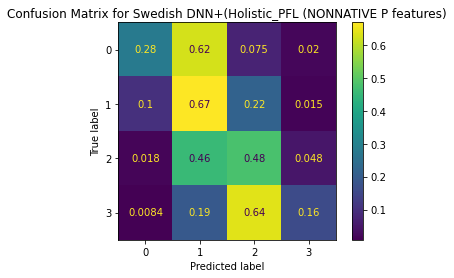

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_PFL+W_FT (W2V2 layer 1, NONNATIVE P features)
              precision    recall  f1-score   support

         0.0     0.3529    0.1660    0.2258       253
         1.0     0.5035    0.6416    0.5642       678
         2.0     0.4044    0.3991    0.4018       456
         3.0     0.2603    0.1597    0.1979       119

    accuracy                         0.4502      1506
   macro avg     0.3803    0.3416    0.3474      1506
weighted avg     0.4290    0.4502    0.4292      1506

SpearmanrResult(correlation=0.29112017966777165, pvalue=8.387870054207452e-31)


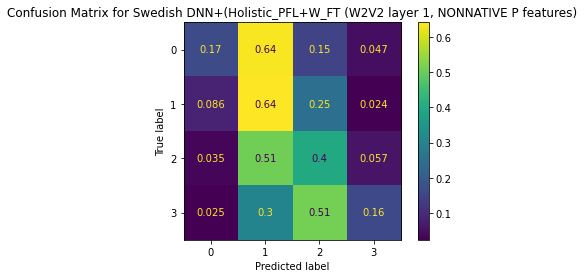

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_W_FT (W2V2 layer 1, NONNATIVE P features)
              precision    recall  f1-score   support

         0.0     0.2460    0.1818    0.2091       253
         1.0     0.4970    0.6165    0.5504       678
         2.0     0.3704    0.3070    0.3357       456
         3.0     0.2400    0.2017    0.2192       119

    accuracy                         0.4170      1506
   macro avg     0.3383    0.3268    0.3286      1506
weighted avg     0.3962    0.4170    0.4019      1506

SpearmanrResult(correlation=0.26525091553009567, pvalue=1.1462348086341334e-25)


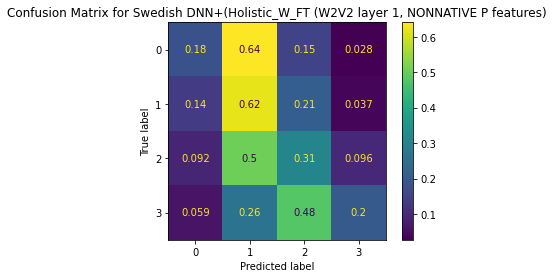

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_PFL+W_PT (W2V2 layer 1, NONNATIVE P features)
              precision    recall  f1-score   support

         0.0     0.3333    0.1621    0.2181       253
         1.0     0.5179    0.6401    0.5726       678
         2.0     0.4352    0.4715    0.4526       456
         3.0     0.4118    0.1765    0.2471       119

    accuracy                         0.4721      1506
   macro avg     0.4246    0.3625    0.3726      1506
weighted avg     0.4535    0.4721    0.4510      1506

SpearmanrResult(correlation=0.3590435345962543, pvalue=4.816366274648197e-47)


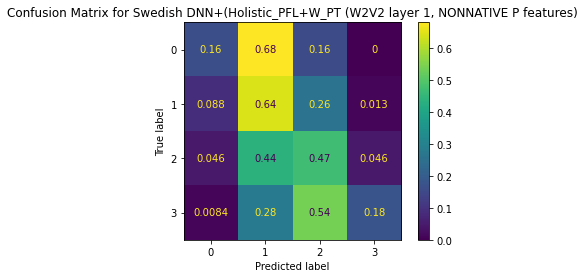

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_W_PT (W2V2 layer 1, NONNATIVE P features)
              precision    recall  f1-score   support

         0.0     0.2150    0.0909    0.1278       253
         1.0     0.4719    0.6563    0.5490       678
         2.0     0.3759    0.3421    0.3582       456
         3.0     0.2683    0.0924    0.1375       119

    accuracy                         0.4216      1506
   macro avg     0.3328    0.2954    0.2931      1506
weighted avg     0.3836    0.4216    0.3880      1506

SpearmanrResult(correlation=0.21986950759983317, pvalue=6.067492342613402e-18)


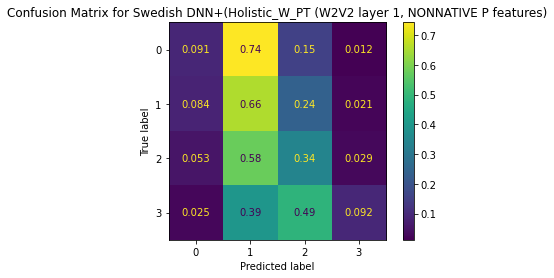

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_PFL+W_FT (W2V2 layer 12, NONNATIVE P features)
              precision    recall  f1-score   support

         0.0     0.5724    0.3439    0.4296       253
         1.0     0.5969    0.6268    0.6115       678
         2.0     0.4907    0.5789    0.5312       456
         3.0     0.4231    0.3697    0.3946       119

    accuracy                         0.5445      1506
   macro avg     0.5208    0.4799    0.4917      1506
weighted avg     0.5469    0.5445    0.5395      1506

SpearmanrResult(correlation=0.5797629388893879, pvalue=5.731946258243642e-136)


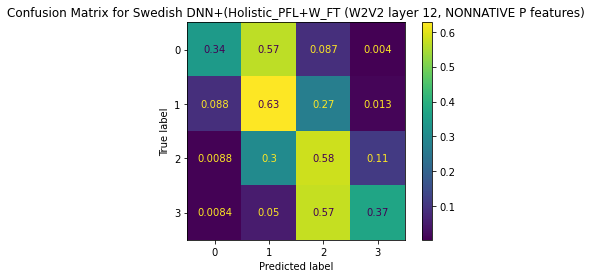

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_W_FT (W2V2 layer 12, NONNATIVE P features)
              precision    recall  f1-score   support

         0.0     0.5591    0.2806    0.3737       253
         1.0     0.5761    0.6755    0.6219       678
         2.0     0.4918    0.5285    0.5095       456
         3.0     0.4894    0.3866    0.4319       119

    accuracy                         0.5418      1506
   macro avg     0.5291    0.4678    0.4842      1506
weighted avg     0.5409    0.5418    0.5311      1506

SpearmanrResult(correlation=0.5375410262632622, pvalue=1.6250562839561993e-113)


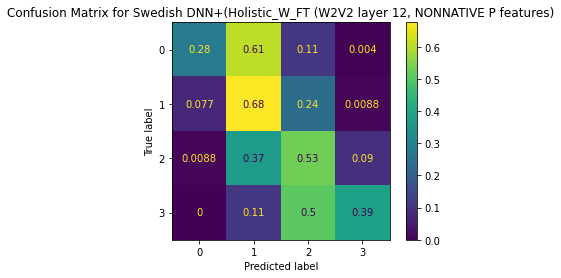

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_PFL+W_PT (W2V2 layer 12, NONNATIVE P features)
              precision    recall  f1-score   support

         0.0     0.4595    0.2688    0.3392       253
         1.0     0.5362    0.7419    0.6225       678
         2.0     0.4891    0.3925    0.4355       456
         3.0     0.5370    0.2437    0.3353       119

    accuracy                         0.5173      1506
   macro avg     0.5055    0.4117    0.4331      1506
weighted avg     0.5091    0.5173    0.4956      1506

SpearmanrResult(correlation=0.4715999682064527, pvalue=3.0522954492521884e-84)


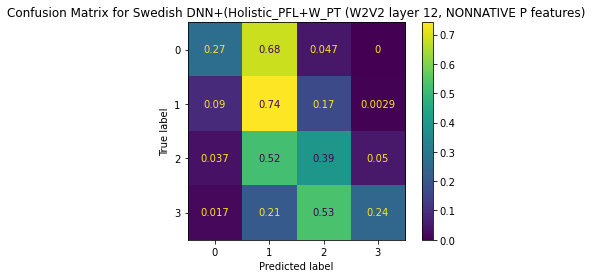

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_W_PT (W2V2 layer 12, NONNATIVE P features)
              precision    recall  f1-score   support

         0.0     0.3167    0.2253    0.2633       253
         1.0     0.5301    0.5841    0.5558       678
         2.0     0.4420    0.4759    0.4583       456
         3.0     0.3864    0.2857    0.3285       119

    accuracy                         0.4675      1506
   macro avg     0.4188    0.3927    0.4015      1506
weighted avg     0.4562    0.4675    0.4592      1506

SpearmanrResult(correlation=0.4321965416438943, pvalue=1.4034857830239166e-69)


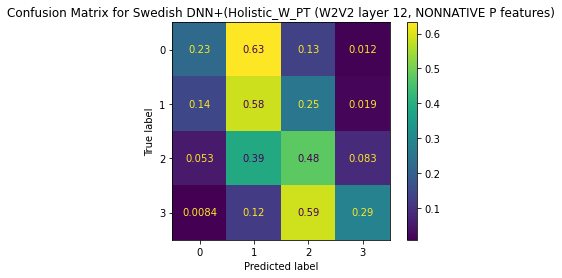

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_PFL+W_FT (W2V2 layer 24, NONNATIVE P features)
              precision    recall  f1-score   support

         0.0     0.5068    0.2925    0.3709       253
         1.0     0.5474    0.6563    0.5969       678
         2.0     0.4593    0.4452    0.4521       456
         3.0     0.4000    0.3529    0.3750       119

    accuracy                         0.5073      1506
   macro avg     0.4784    0.4367    0.4487      1506
weighted avg     0.5022    0.5073    0.4976      1506

SpearmanrResult(correlation=0.4793027332543415, pvalue=2.4362700141857433e-87)


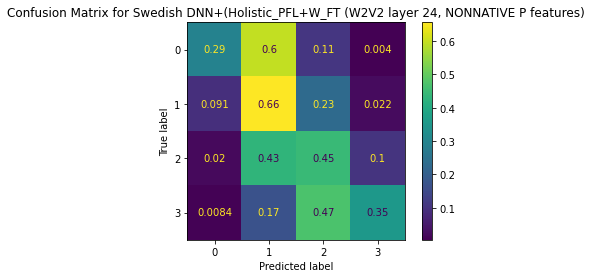

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_W_FT (W2V2 layer 24, NONNATIVE P features)
              precision    recall  f1-score   support

         0.0     0.4571    0.3162    0.3738       253
         1.0     0.5263    0.6490    0.5812       678
         2.0     0.4597    0.4123    0.4347       456
         3.0     0.4651    0.3361    0.3902       119

    accuracy                         0.4967      1506
   macro avg     0.4771    0.4284    0.4450      1506
weighted avg     0.4897    0.4967    0.4869      1506

SpearmanrResult(correlation=0.48689450289569963, pvalue=1.798775841729473e-90)


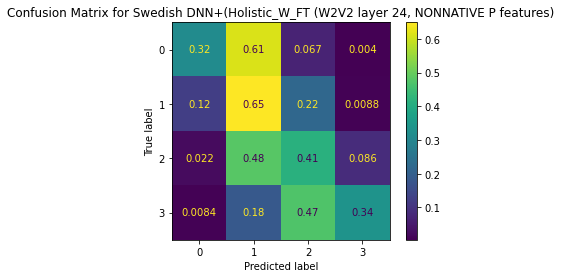

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Results. Swedish. Holistic_PFL+W_PT (W2V2 layer 24, NONNATIVE P features)
              precision    recall  f1-score   support

         0.0     0.4659    0.1621    0.2405       253
         1.0     0.5314    0.7478    0.6213       678
         2.0     0.4650    0.4364    0.4502       456
         3.0     0.4167    0.1261    0.1935       119

    accuracy                         0.5060      1506
   macro avg     0.4697    0.3681    0.3764      1506
weighted avg     0.4912    0.5060    0.4717      1506

SpearmanrResult(correlation=0.41355617863615296, pvalue=2.735381525761576e-63)


/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


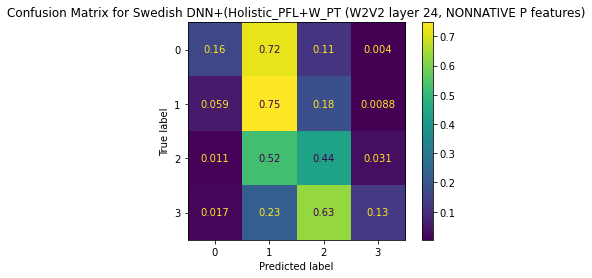

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_W_PT (W2V2 layer 24, NONNATIVE P features)
              precision    recall  f1-score   support

         0.0     0.2000    0.0909    0.1250       253
         1.0     0.4897    0.6298    0.5510       678
         2.0     0.4060    0.4167    0.4113       456
         3.0     0.4902    0.2101    0.2941       119

    accuracy                         0.4416      1506
   macro avg     0.3965    0.3369    0.3453      1506
weighted avg     0.4157    0.4416    0.4168      1506

SpearmanrResult(correlation=0.2784863956000741, pvalue=3.1654312538423775e-28)


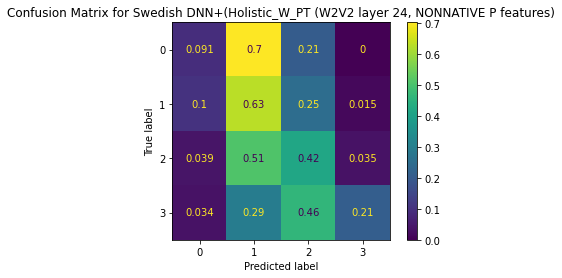

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_PFL (NATIVE P features)
              precision    recall  f1-score   support

         0.0     0.4379    0.2925    0.3507       253
         1.0     0.5179    0.7242    0.6039       678
         2.0     0.4800    0.3684    0.4169       456
         3.0     0.5128    0.1681    0.2532       119

    accuracy                         0.5000      1506
   macro avg     0.4872    0.3883    0.4062      1506
weighted avg     0.4926    0.5000    0.4770      1506

SpearmanrResult(correlation=0.42347754038816277, pvalue=1.3758623595677385e-66)


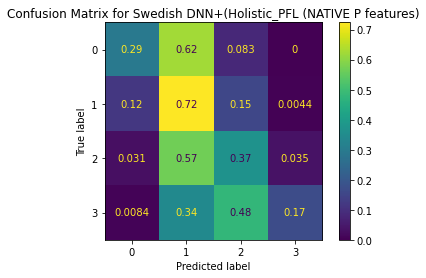

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Results. Swedish. Holistic_PFL+W_FT (W2V2 layer 1, NATIVE P features)
              precision    recall  f1-score   support

         0.0     0.3012    0.3083    0.3047       253
         1.0     0.4850    0.5501    0.5155       678
         2.0     0.4151    0.3860    0.4000       456
         3.0     0.2963    0.1345    0.1850       119

    accuracy                         0.4270      1506
   macro avg     0.3744    0.3447    0.3513      1506
weighted avg     0.4181    0.4270    0.4190      1506

SpearmanrResult(correlation=0.3248424593984223, pvalue=2.3950765021960954e-38)


/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


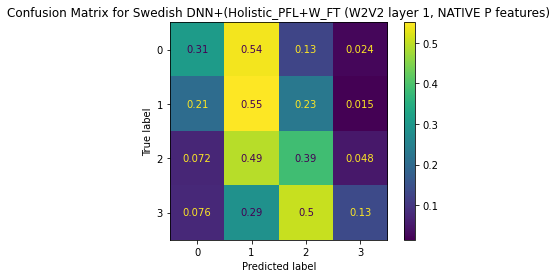

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Results. Swedish. Holistic_W_FT (W2V2 layer 1, NATIVE P features)
              precision    recall  f1-score   support

         0.0     0.2460    0.1818    0.2091       253
         1.0     0.4970    0.6165    0.5504       678
         2.0     0.3704    0.3070    0.3357       456
         3.0     0.2400    0.2017    0.2192       119

    accuracy                         0.4170      1506
   macro avg     0.3383    0.3268    0.3286      1506
weighted avg     0.3962    0.4170    0.4019      1506

SpearmanrResult(correlation=0.26525091553009567, pvalue=1.1462348086341334e-25)


/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


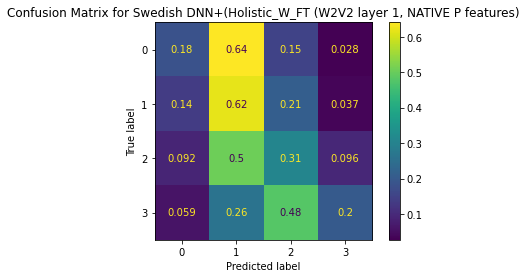

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_PFL+W_PT (W2V2 layer 1, NATIVE P features)
              precision    recall  f1-score   support

         0.0     0.4300    0.1700    0.2436       253
         1.0     0.5347    0.6711    0.5952       678
         2.0     0.4538    0.5066    0.4788       456
         3.0     0.3913    0.1513    0.2182       119

    accuracy                         0.4960      1506
   macro avg     0.4525    0.3747    0.3839      1506
weighted avg     0.4813    0.4960    0.4711      1506

SpearmanrResult(correlation=0.4109227982129214, pvalue=1.9680052950792797e-62)


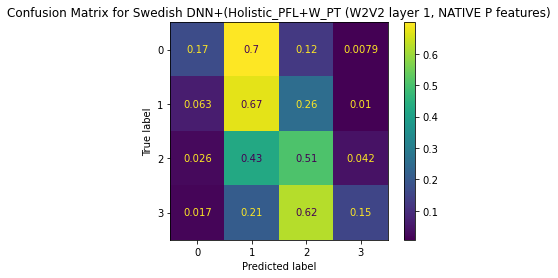

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_W_PT (W2V2 layer 1, NATIVE P features)
              precision    recall  f1-score   support

         0.0     0.2150    0.0909    0.1278       253
         1.0     0.4719    0.6563    0.5490       678
         2.0     0.3759    0.3421    0.3582       456
         3.0     0.2683    0.0924    0.1375       119

    accuracy                         0.4216      1506
   macro avg     0.3328    0.2954    0.2931      1506
weighted avg     0.3836    0.4216    0.3880      1506

SpearmanrResult(correlation=0.21986950759983317, pvalue=6.067492342613402e-18)


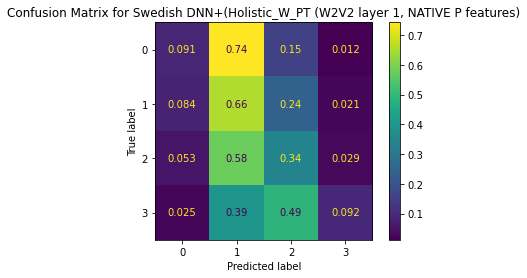

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_PFL+W_FT (W2V2 layer 12, NATIVE P features)
              precision    recall  f1-score   support

         0.0     0.5962    0.3676    0.4548       253
         1.0     0.5852    0.6283    0.6060       678
         2.0     0.4902    0.6031    0.5408       456
         3.0     0.5738    0.2941    0.3889       119

    accuracy                         0.5505      1506
   macro avg     0.5613    0.4733    0.4976      1506
weighted avg     0.5574    0.5505    0.5437      1506

SpearmanrResult(correlation=0.5636890197156893, pvalue=4.890771066205498e-127)


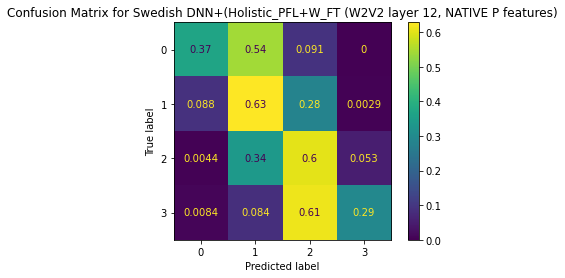

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_PFL+W_FT (W2V2 layer 12, NATIVE P features)
              precision    recall  f1-score   support

         0.0     0.5962    0.3676    0.4548       253
         1.0     0.5852    0.6283    0.6060       678
         2.0     0.4902    0.6031    0.5408       456
         3.0     0.5738    0.2941    0.3889       119

    accuracy                         0.5505      1506
   macro avg     0.5613    0.4733    0.4976      1506
weighted avg     0.5574    0.5505    0.5437      1506

SpearmanrResult(correlation=0.5636890197156893, pvalue=4.890771066205498e-127)


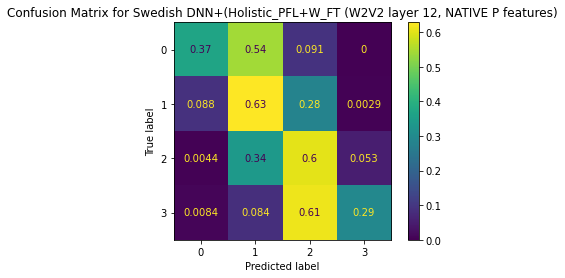

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_W_FT (W2V2 layer 12, NATIVE P features)
              precision    recall  f1-score   support

         0.0     0.5591    0.2806    0.3737       253
         1.0     0.5761    0.6755    0.6219       678
         2.0     0.4918    0.5285    0.5095       456
         3.0     0.4894    0.3866    0.4319       119

    accuracy                         0.5418      1506
   macro avg     0.5291    0.4678    0.4842      1506
weighted avg     0.5409    0.5418    0.5311      1506

SpearmanrResult(correlation=0.5375410262632622, pvalue=1.6250562839561993e-113)


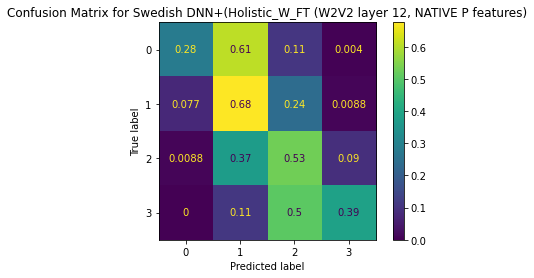

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Results. Swedish. Holistic_PFL+W_PT (W2V2 layer 12, NATIVE P features)
              precision    recall  f1-score   support

         0.0     0.5200    0.1542    0.2378       253
         1.0     0.5415    0.7404    0.6255       678
         2.0     0.4815    0.4561    0.4685       456
         3.0     0.5694    0.3445    0.4293       119

    accuracy                         0.5246      1506
   macro avg     0.5281    0.4238    0.4403      1506
weighted avg     0.5219    0.5246    0.4973      1506

SpearmanrResult(correlation=0.4616748729526455, pvalue=2.2972858616265842e-80)


/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


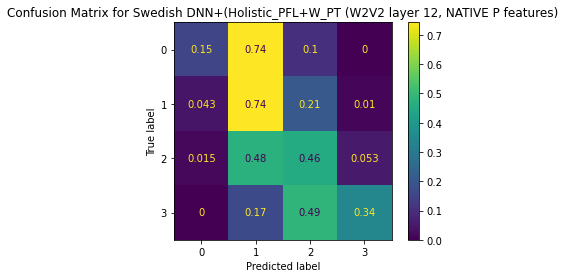

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Results. Swedish. Holistic_W_PT (W2V2 layer 12, NATIVE P features)
              precision    recall  f1-score   support

         0.0     0.3167    0.2253    0.2633       253
         1.0     0.5301    0.5841    0.5558       678
         2.0     0.4420    0.4759    0.4583       456
         3.0     0.3864    0.2857    0.3285       119

    accuracy                         0.4675      1506
   macro avg     0.4188    0.3927    0.4015      1506
weighted avg     0.4562    0.4675    0.4592      1506

SpearmanrResult(correlation=0.4321965416438943, pvalue=1.4034857830239166e-69)


/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


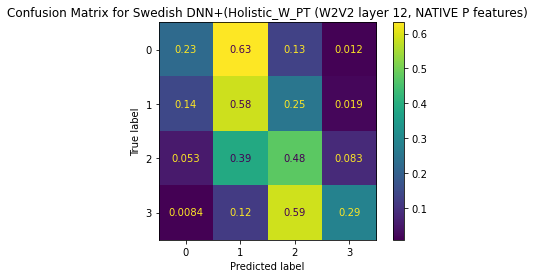

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_PFL+W_FT (W2V2 layer 24, NATIVE P features)
              precision    recall  f1-score   support

         0.0     0.4853    0.3913    0.4333       253
         1.0     0.5785    0.5708    0.5746       678
         2.0     0.4798    0.5197    0.4989       456
         3.0     0.3885    0.4538    0.4186       119

    accuracy                         0.5159      1506
   macro avg     0.4830    0.4839    0.4814      1506
weighted avg     0.5179    0.5159    0.5156      1506

SpearmanrResult(correlation=0.49715327139660304, pvalue=7.865076602239579e-95)


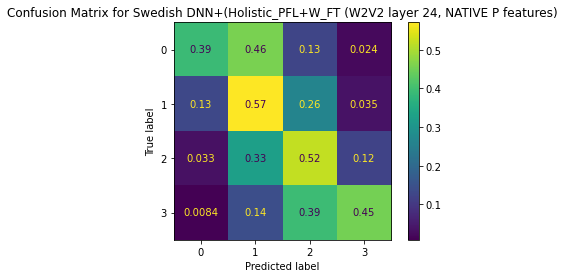

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_W_FT (W2V2 layer 24, NATIVE P features)
              precision    recall  f1-score   support

         0.0     0.4571    0.3162    0.3738       253
         1.0     0.5263    0.6490    0.5812       678
         2.0     0.4597    0.4123    0.4347       456
         3.0     0.4651    0.3361    0.3902       119

    accuracy                         0.4967      1506
   macro avg     0.4771    0.4284    0.4450      1506
weighted avg     0.4897    0.4967    0.4869      1506

SpearmanrResult(correlation=0.48689450289569963, pvalue=1.798775841729473e-90)


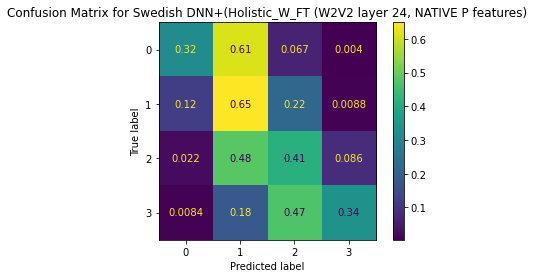

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_PFL+W_PT (W2V2 layer 24, NATIVE P features)
              precision    recall  f1-score   support

         0.0     0.4773    0.0830    0.1414       253
         1.0     0.5334    0.7537    0.6247       678
         2.0     0.4735    0.5088    0.4905       456
         3.0     0.6429    0.0756    0.1353       119

    accuracy                         0.5133      1506
   macro avg     0.5318    0.3553    0.3480      1506
weighted avg     0.5145    0.5133    0.4642      1506

SpearmanrResult(correlation=0.3884614903071448, pvalue=1.9881107378151194e-55)


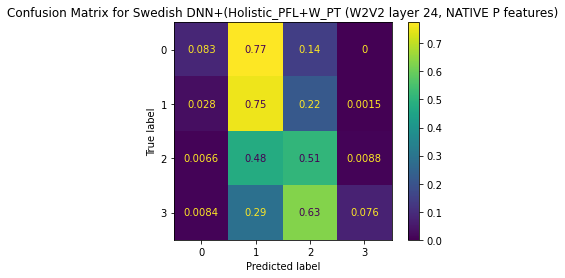

/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged ye

Results. Swedish. Holistic_W_PT (W2V2 layer 24, NATIVE P features)
              precision    recall  f1-score   support

         0.0     0.2000    0.0909    0.1250       253
         1.0     0.4897    0.6298    0.5510       678
         2.0     0.4060    0.4167    0.4113       456
         3.0     0.4902    0.2101    0.2941       119

    accuracy                         0.4416      1506
   macro avg     0.3965    0.3369    0.3453      1506
weighted avg     0.4157    0.4416    0.4168      1506

SpearmanrResult(correlation=0.2784863956000741, pvalue=3.1654312538423775e-28)


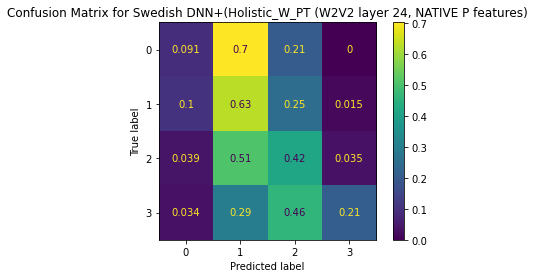

In [3]:
from functools import reduce
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network  import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from scipy.stats import spearmanr
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

TRUNCATE=True
TRUNCATE_FLUENCY=False


threshold = lambda x: 2.0 <= x <= 5.0
threshold_fluency_fi = lambda x: x >= 1.5

def process(df, round_labels=True):
    if round_labels:
        for column in [x for x in holistic_labels.columns if '_FairAvg' in x]:
            df[column] = df[column].map(np.vectorize(true_round))
    if any(x in df.columns for x in ["Unnamed: 0", "identifier","n_sentences"]):
        df.drop(columns=["Unnamed: 0", "identifier","n_sentences"], inplace=True)
    df.fillna(0.0, inplace=True)
    # drop sparse features
    df = df.loc[:, (df != 0).any(axis=0)]
    
    if TRUNCATE_FLUENCY:
        df = df[df['fluency_FairAvg'].apply(threshold_fluency_fi)]
    if TRUNCATE:
        df = df[df['holistic_FairAvg'].apply(threshold)]
        
    return df

def prepare_train_test(df, fold, label_column_name='holistic_FairAvg', save_encoder=False):
    X_train = df[df['split']!=fold].drop(['sample','split'] + [x for x in df.columns if '_FairAvg' in str(x)], axis=1)
    X_test = df[df['split']==fold].drop(['sample','split'] + [x for x in df.columns if '_FairAvg' in str(x)], axis=1)

    y = df[label_column_name]
    encoder = LabelEncoder()
    encoder.fit(y.astype('str'))

    y_train = encoder.transform(df[df['split']!=fold][label_column_name].astype('str'))
    y_test = encoder.transform(df[df['split']==fold][label_column_name].astype('str'))

    if save_encoder:
        filename = f'/scratch/work/getmany1/wav2vec/LAQ_2022/saved_models/encoder_swedish_{"_".join(label_column_name.split("_")[:-1])}.pkl'
        pickle.dump(encoder, open(filename, 'wb'))

    return  X_train, X_test, y_train, y_test

def train_classifier(df, title, save_pipe=False, label_column_name='holistic_FairAvg'):

    y_test_full = np.empty(0)
    y_pred_full = np.empty(0)
    for fold in range(4):
        X_train, X_test, y_train, y_test = prepare_train_test(df, fold, label_column_name)    

        mlp = MLPClassifier(hidden_layer_sizes=(300,)*6, 
                            max_iter=600, random_state=RANDOM_SEED, 
                            n_iter_no_change=1000, verbose=0, early_stopping=True, 
                            learning_rate='invscaling', batch_size=100)
        pipe = Pipeline([('scaler', MinMaxScaler()), ('mlp', mlp)]) #pickle that

        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        y_test_full = np.append(y_test_full,y_test)
        y_pred_full = np.append(y_pred_full,y_pred)

        if save_pipe:
            filename = f'/scratch/work/getmany1/wav2vec/LAQ_2022/saved_models/pipe_swedish_{title}.pkl'
            pickle.dump(pipe, open(filename, 'wb'))

    print(f"Results. Swedish. {title} {str('(W2V2 layer '+ str(model_layer) + f', {pron_feat_mode} P features)' if model_layer and 'W_' in title else f'({pron_feat_mode} P features)')}")
    print(classification_report(y_test_full, y_pred_full, digits=4))

    print(spearmanr(y_test_full, y_pred_full))

    cm = confusion_matrix(y_test_full, y_pred_full, labels=mlp.classes_, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=mlp.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix for Swedish DNN+({title} {str('(W2V2 layer '+ str(model_layer) + f', {pron_feat_mode} P features)' if model_layer and 'W_' in title else f'({pron_feat_mode} P features)')}")
    plt.show()

for mode in ["NATIVE"]:
    for layer in [12,24]:
    
        model_layer=layer
        pkl_pt=f"/scratch/work/getmany1/wav2vec/slt_2022/sv/pt/w2v2_digitala_feats_dict_sv_pt_layer_{str(model_layer)}.pkl"
        pkl_ft=f"/scratch/work/getmany1/wav2vec/slt_2022/sv/ft/w2v2_digitala_feats_dict_sv_ft_layer_{str(model_layer)}.pkl"

        with open(pkl_ft, 'rb') as f:
            w2v2_sv_dict_ft = pickle.load(f)

        with open(pkl_pt, 'rb') as f:
            w2v2_sv_dict_pt = pickle.load(f)

        d2_ft = {k: np.mean(v, axis=0) for k, v in w2v2_sv_dict_ft.items()}
        w2v2_data_ft = pd.DataFrame.from_dict(d2_ft, orient='index', )
        w2v2_data_ft.index.names = ['sample']
        w2v2_data_ft.reset_index(inplace=True)

        d2_pt = {k: np.mean(v, axis=0) for k, v in w2v2_sv_dict_pt.items()}
        w2v2_data_pt = pd.DataFrame.from_dict(d2_pt, orient='index', )
        w2v2_data_pt.index.names = ['sample']
        w2v2_data_pt.reset_index(inplace=True)


        pron_feat_mode=mode
        pron_data = pd.read_csv(f'/scratch/work/getmany1/wav2vec/slt_2022/sv/features/results_sv_{pron_feat_mode}_ASR_060720222.csv', usecols=pronun_features)

        # load the feature subsets
        df_pflw_ft = reduce(lambda df1,df2: pd.merge(df1,df2,on='sample'), [w2v2_data_ft, fluen_data, pron_data, lexical_data, holistic_labels])
        df_w_ft = reduce(lambda df1,df2: pd.merge(df1,df2,on='sample'), [w2v2_data_ft, holistic_labels])
        df_pflw_pt = reduce(lambda df1,df2: pd.merge(df1,df2,on='sample'), [w2v2_data_pt, fluen_data, pron_data, lexical_data, holistic_labels])
        df_w_pt = reduce(lambda df1,df2: pd.merge(df1,df2,on='sample'), [w2v2_data_pt, holistic_labels])
        df_pfl = reduce(lambda df1,df2: pd.merge(df1,df2,on='sample'), [fluen_data, pron_data, lexical_data, holistic_labels])
        df_p = reduce(lambda df1,df2: pd.merge(df1,df2,on='sample'), [pron_data, holistic_labels])
        df_f = reduce(lambda df1,df2: pd.merge(df1,df2,on='sample'), [fluen_data, holistic_labels])
        df_pw_ft = reduce(lambda df1,df2: pd.merge(df1,df2,on='sample'), [w2v2_data_ft, pron_data, holistic_labels]) #f+w2v2 to predtct fluency score
        df_fw_ft = reduce(lambda df1,df2: pd.merge(df1,df2,on='sample'), [w2v2_data_ft, fluen_data, holistic_labels])#f+w2v2 to predtct pron. score
        df_lg = reduce(lambda df1,df2: pd.merge(df1,df2,on='sample'), [lexical_data, gram_data, holistic_labels])

        df_pflw_ft=process(df_pflw_ft)
        df_w_ft=process(df_w_ft)
        df_pflw_pt=process(df_pflw_pt)
        df_w_pt=process(df_w_pt)
        df_pfl=process(df_pfl)
        df_p=process(df_p)
        df_f=process(df_f)
        df_pw_ft=process(df_pw_ft)
        df_fw_ft=process(df_fw_ft)
        df_lg=process(df_lg)

        if model_layer==1:
            train_classifier(df_pfl, title='Holistic_PFL')
        train_classifier(df_pflw_ft, title='Holistic_PFL+W_FT')
        train_classifier(df_w_ft, title='Holistic_W_FT', save_pipe=False)
        train_classifier(df_pflw_pt, title="Holistic_PFL+W_PT")
        train_classifier(df_w_pt, title='Holistic_W_PT', save_pipe=False)

## 12.07.2022. SLT. W2V2 fine-tuned for classification.

Results. Swedish. RAW_pt. 
              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000       253
         1.0     0.5330    0.6077    0.5679       678
         2.0     0.4017    0.6053    0.4829       456
         3.0     0.4565    0.1765    0.2545       119

    accuracy                         0.4708      1506
   macro avg     0.3478    0.3474    0.3263      1506
weighted avg     0.3977    0.4708    0.4220      1506

SpearmanrResult(correlation=0.37347527148311294, pvalue=4.7646960594679835e-51)


/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

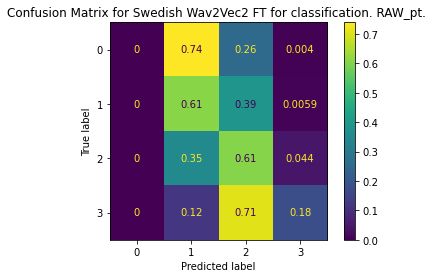

Results. Swedish. RAW_pt. _frozen_FE
              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000       253
         1.0     0.5370    0.5354    0.5362       678
         2.0     0.3805    0.6601    0.4828       456
         3.0     0.3077    0.1008    0.1519       119

    accuracy                         0.4489      1506
   macro avg     0.3063    0.3241    0.2927      1506
weighted avg     0.3813    0.4489    0.3996      1506

SpearmanrResult(correlation=0.3560292195091046, pvalue=3.1150977259492876e-46)


/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/work/getmany1/wav2vec/w2venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

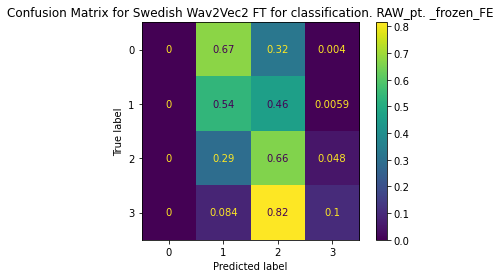

Results. Swedish. ASR_ft. 
              precision    recall  f1-score   support

         0.0     0.5424    0.5810    0.5611       253
         1.0     0.6212    0.6578    0.6390       678
         2.0     0.5733    0.5658    0.5695       456
         3.0     0.6567    0.3697    0.4731       119

    accuracy                         0.5943      1506
   macro avg     0.5984    0.5436    0.5607      1506
weighted avg     0.5963    0.5943    0.5918      1506

SpearmanrResult(correlation=0.6421877730028699, pvalue=7.109211296207112e-176)


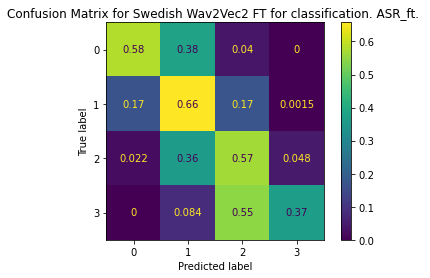

Results. Swedish. ASR_ft. _frozen_FE
              precision    recall  f1-score   support

         0.0     0.5547    0.6008    0.5769       253
         1.0     0.6140    0.6711    0.6413       678
         2.0     0.5748    0.5395    0.5566       456
         3.0     0.6349    0.3361    0.4396       119

    accuracy                         0.5930      1506
   macro avg     0.5946    0.5369    0.5536      1506
weighted avg     0.5938    0.5930    0.5889      1506

SpearmanrResult(correlation=0.6471860697552991, pvalue=1.7647414213324308e-179)


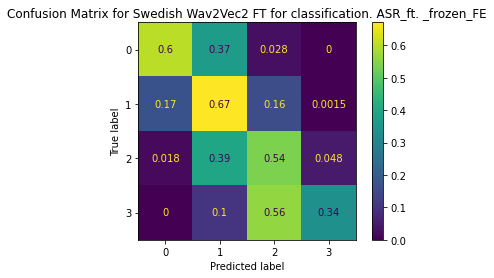

In [2]:
from sklearn.metrics import classification_report
from scipy.stats import spearmanr
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

with open("/scratch/work/getmany1/wav2vec/slt_2022/sv/labels.pkl", 'rb') as f:
    y_test_full = pickle.load(f)
for model_type in ["RAW_pt","ASR_ft"]:
    for fe in ["","_frozen_FE"]:
        with open(f"/scratch/work/getmany1/wav2vec/slt_2022/sv/class_ft_w2v2_outputs/predictions_{model_type}{fe}.pkl", 'rb') as f:
            y_pred_full = pickle.load(f)
        print(f"Results. Swedish. {model_type}. {fe}")
        print(classification_report(y_test_full, y_pred_full, digits=4))
        print(spearmanr(y_test_full, y_pred_full))

        cm = confusion_matrix(y_test_full, y_pred_full, labels=[i for i in range(4)], normalize='true')
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                     display_labels=[i for i in range(4)])
        disp.plot()
        plt.title(f"Confusion Matrix for Swedish Wav2Vec2 FT for classification. {model_type}. {fe}")
        plt.show()